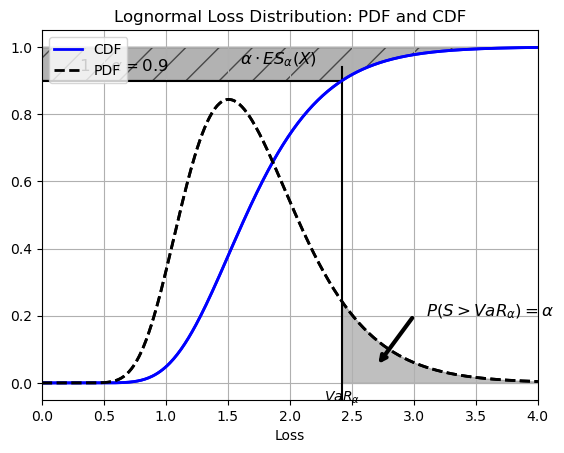

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parameters for lognormal distribution
mu = 0.5
sigma = 0.3
s = sigma
scale = np.exp(mu)

# Define the PDF and CDF
def dlognormal_loss(x):
    return lognorm.pdf(x, s, scale=scale)

def plognormal_loss(x):
    return lognorm.cdf(x, s, scale=scale)

# Plot the CDF
x_vals = np.linspace(0, 4, 400)
plt.plot(x_vals, plognormal_loss(x_vals), color = 'blue', label='CDF', linewidth=2)

# Plot the PDF
plt.plot(x_vals, dlognormal_loss(x_vals), label='PDF', color='black', linestyle='--', linewidth=2)

# Fill area beyond VaR (shadow region)
var_alpha = 2.42
x_fill = np.linspace(var_alpha, 4, 100)
y_fill = dlognormal_loss(x_fill)
plt.fill_between(x_fill, y_fill, color='grey', alpha=0.5)

# Add arrow and text for P(S > VaR[alpha]) == alpha
plt.text(3.1, 0.2, r'$P(S > VaR_{\alpha}) = \alpha$', fontsize=12)
plt.annotate('', xy=(2.7, 0.05), xytext=(3, 0.2),
             arrowprops=dict(arrowstyle='->', lw=3))

# Mark VaR[alpha]
plt.axvline(x=var_alpha, ymin=0, ymax=0.9, color='black', linestyle='-')
plt.axhline(y=0.9, xmin=0, xmax=var_alpha/4, color='black', linestyle='-')
plt.text(var_alpha, -0.02, r'$VaR_{\alpha}$', ha='center', va='top')

# Fill for expected shortfall (striped)
x_es = np.linspace(var_alpha, 4, 100)
y_es = plognormal_loss(x_es)
x_poly = np.concatenate(([0], x_es, [0]))
y_poly = np.concatenate(([0.9], y_es, [plognormal_loss(4)]))
plt.fill(x_poly, y_poly, facecolor='grey', edgecolor='black', hatch='/', linewidth=1, alpha=0.6)

plt.text(0.3, 0.93, r'$1 - \alpha = 0.9$', fontsize=12)
plt.text(1.6, 0.95, r'$\alpha \cdot ES_{\alpha}(X)$', fontsize=12)

# Replot curves for clarity
plt.plot(x_vals, plognormal_loss(x_vals), color='blue', linewidth=2)
plt.plot(x_vals, dlognormal_loss(x_vals), color='black', linestyle='--', linewidth=2)

# Legend


# Labels and display
plt.xlabel('Loss')
plt.ylim(-0.05, 1.05)
plt.xlim(0, 4)
plt.grid(True)
plt.title('Lognormal Loss Distribution: PDF and CDF')
plt.legend(loc='upper left')
plt.show()
